In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from tabulate import tabulate
from sqlalchemy import create_engine, text

In [2]:
from sqlalchemy import create_engine

username = "root"
password = "password"
host     = "localhost"
port     = "3306"
database = "hospital_management"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
<div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">1. Appointments Analysis</h2>
  </div>
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b>To know number of Total Appointments</b>
      <li><b>Unique Reasons for Visit with appointment and completed appointments.</b>
      <li><b>Unique Appointment Status count.</b>
      <li><b>Monthly appointments count and completed appointments.</b>
      <li><b>Weekly appointments count and completed appointments.</b>
    </ul>
  </div>
</div>

In [3]:
df = pd.read_sql("""
select 
    count(appointment_id) as total_appointments_count
from appointments;
""", con=engine)
print('== total_appointments: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    reason_for_visit, 
    count(*) as visit_count,
    sum(case when status = 'completed' then 1 else 0 end) as completed
from appointments
group by reason_for_visit
order by completed desc;
""", con=engine)
print('\n== Reasons for visit with count: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    status, 
    count(*) as status_count 
from appointments
group by status
order by status_count desc;
""", con=engine)
print('\n== Appointment status with count: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
SELECT 
    DATE_FORMAT(appointment_date, '%%Y-%%m') AS month, 
    COUNT(*) AS total_appointments,
    sum(case when status = 'completed' then 1 else 0 end) as completed
FROM appointments
GROUP BY month
ORDER BY month;
""", con=engine)
print('\n== Monthly Appointment Trends ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

== total_appointments: ==
+----------------------------+
|   total_appointments_count |
|----------------------------|
|                        200 |
+----------------------------+

== Reasons for visit with count: ==
+--------------------+---------------+-------------+
| reason_for_visit   |   visit_count |   completed |
|--------------------+---------------+-------------|
| Checkup            |            45 |          16 |
| Follow-up          |            41 |          12 |
| Therapy            |            42 |           9 |
| Emergency          |            29 |           5 |
| Consultation       |            43 |           4 |
+--------------------+---------------+-------------+

== Appointment status with count: ==
+-----------+----------------+
| status    |   status_count |
|-----------+----------------|
| No-show   |             52 |
| Scheduled |             51 |
| Cancelled |             51 |
| Completed |             46 |
+-----------+----------------+

== Monthly Appoint

### Insights:-
- Total appointments are `200` but only `46(~23%)` has been completed it means most patients are not completing their appointments(it's affecting revenue for sure). `No-show` and `cancellation` dominating with `highest(no-show) -> 52appointments ~26%` and `lowest completed approx 23%`.
- In completed appointments `checkups` and `follow-up` dominating the list, `therapy, emergency, consultation` are very low.
- Even in months with higher appointments, completed appointments remails very low with (max.(24) and completed(9) appointmets in april) and (in october out of 14 appointments o completed).
-  `appointments completion rate is very low.`

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
<div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">2. Billing Analysis</h2>
  </div>
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b>Total number of Bills & bill amount</b> :- To Count all bills and calculate total bill_amount.</li>
      <li><b>Payment Methods Analysis</b> :- To find Unique Payment_methods and total bill amount in each method and paid amount(revenue by each payment_method)</li>
      <li><b>Payment Status</b> :- To analyse different payment_status with total bill amount.</li>
      <li><b>Monthly Revenue Trends</b> :- To know total_bills and paid bills in each month and amount in both.</li>
    </ul>
  </div>
</div>

In [4]:
df = pd.read_sql("""
select 
    count(bill_id) as total_bills_count, 
    sum(amount) as total_bill_amount
from billing;
""", con=engine)
print('== Total_Bills: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    payment_status, 
    count(*) as status_count, 
    sum(amount) as amount
from billing
group by payment_status;
""", con=engine)
print('\n== Appointment status with count and bill amount: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    payment_method, 
    count(*) as payment_count, 
    sum(case when payment_status = 'paid' then 1 else 0 end) as paid_bills,
    sum(amount) as total_amount,
    sum(case when payment_status = 'paid' then amount else 0 end) as paid_amount
from billing
group by payment_method;
""", con=engine)
print('\n== Different payment methods with count and revenue: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
SELECT 
    DATE_FORMAT(bill_date, '%%Y-%%m') AS month,
    COUNT(*) AS total_bills,
    sum(case when payment_status = 'paid' then 1 else 0 end) as paid_bills,
    sum(amount) as total_amount,
    sum(case when payment_status = 'paid' then amount else 0 end) as paid_amount
FROM billing
GROUP BY month
ORDER BY paid_amount desc;
""", con=engine)
print('\n== Monthly Revenue Trends: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

== Total_Bills: ==
+---------------------+---------------------+
|   total_bills_count |   total_bill_amount |
|---------------------+---------------------|
|                 200 |              551250 |
+---------------------+---------------------+

== Appointment status with count and bill amount: ==
+------------------+----------------+----------+
| payment_status   |   status_count |   amount |
|------------------+----------------+----------|
| Pending          |             69 |   184612 |
| Paid             |             64 |   173425 |
| Failed           |             67 |   193213 |
+------------------+----------------+----------+

== Different payment methods with count and revenue: ==
+------------------+-----------------+--------------+----------------+---------------+
| payment_method   |   payment_count |   paid_bills |   total_amount |   paid_amount |
|------------------+-----------------+--------------+----------------+---------------|
| Insurance        |              64

### Insigts:-
- Total bill count is `200` with amount `551250`.
- Out of total `5.5lakh` dollar only `1.73lakh` dollar has been collected collection rate is `very low ~31%`.
- `~69% amount` either `pending or failed` (failed is highest 1.93lakh USD(35%))
- Collected amout (Insurance - 60356.5 || Credit Card - 60377.1 || Cash - 52691.3 ) comes from `three different payment` methods.
- `June` had the best collection `over 30K USD` and `july and february` are the weakest months in terms of revenue with < 8K USD.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
<div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">3. Doctors Analysis</h2>
  </div>
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b>Total Doctors</b> – Find the overall number of doctors in hospital.</li>
      <li><b>Doctors by Specialization</b> – Number of Doctors in different specializations.</li>
      <li><b>Doctors Availability in diff. Branches</b> – Count of available doctors at each hospital branch.</li>
      <li><b>Doctors Experience by Branch</b> – To know the Doctors in each branch along with specialization and experience(yrs).</li>
    </ul>
  </div>
</div>

In [5]:
df = pd.read_sql("""
select 
    count(doctor_id) as Doctors_count 
from doctors;
""", con=engine)
print('== Total Doctors: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    specialization, 
    count(*) as doctors_count
from doctors
group by specialization
ORDER BY doctors_count DESC;
""", con=engine)
print('\n== Doctors count in each specialization: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    hospital_branch,
    count(doctor_id) as available_doctors
from doctors
group by hospital_branch
ORDER BY available_doctors DESC;
""", con=engine)
print('\n== Available Doctors in each hospital branch.==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
SELECT 
    hospital_branch, 
    doctor_id, 
    CONCAT(first_name, ' ', last_name) AS doctor_name, 
    specialization, 
    years_experience
FROM doctors
ORDER BY hospital_branch, years_experience DESC;
""", con=engine)
print('\n== Doctors in each Hospital Branch with Experience ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

== Total Doctors: ==
+-----------------+
|   Doctors_count |
|-----------------|
|              10 |
+-----------------+

== Doctors count in each specialization: ==
+------------------+-----------------+
| specialization   |   doctors_count |
|------------------+-----------------|
| Pediatrics       |               5 |
| Dermatology      |               3 |
| Oncology         |               2 |
+------------------+-----------------+

== Available Doctors in each hospital branch.==
+-------------------+---------------------+
| hospital_branch   |   available_doctors |
|-------------------+---------------------|
| Central Hospital  |                   4 |
| Westside Clinic   |                   3 |
| Eastside Clinic   |                   3 |
+-------------------+---------------------+

== Doctors in each Hospital Branch with Experience ==
+-------------------+-------------+---------------+------------------+--------------------+
| hospital_branch   | doctor_id   | doctor_name   | speci

### Insights:-
- `Total 10 doctors` are there across `three` branches `(Pediatrics (5), Dermatology (3), Oncology (2))`
- `Central` branch has `4 doctors`, `Eastside & Westside` branches have `3 each`.
- `Mostly senior (17–28 yrs exp)`, only `1 junior` doctor in Dermatology (Westside) with `5yr. of experience`.
- Central: 2-Pediatrics and 1-Dermatology || Eastside: 2-Pediatrics, 1-Oncology || Westside: Dermatology-2 + 1 Oncology doctors spread all over branches.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">4. Patients Analysis</h2>
  </div>
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b>Patients Count by Gender</b> – To find number of patients gender wise.</li>
      <li><b>Insurance Providers</b> – Identify different insurance providers and their patient counts.</li>
      <li><b>Youngest and Oldest Patient</b> – To find the minimum and maximum age of patients.</li>
      <li><b>Monthly patient trend</b> – To find patient registrations month-wise.</li>
    </ul>
  </div>
</div>

In [6]:
df = pd.read_sql("""
select 
    gender, 
    count(patient_id) as Patient_count 
from patients
group by gender;
""", con=engine)
print('== Patients count: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    insurance_provider, 
    count(*) as count
from patients
group by insurance_provider
order by count desc;
""", con=engine)
print('\n== Different insurance providers: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
SELECT 
    MIN(TIMESTAMPDIFF(YEAR, date_of_birth, CURDATE())) AS min_age,
    MAX(TIMESTAMPDIFF(YEAR, date_of_birth, CURDATE())) AS max_age
FROM patients;
""", con=engine)
print('\n== Youngest and Oldest Patient Age ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
SELECT 
    DATE_FORMAT(registration_date, '%%Y-%%m') AS month,
    COUNT(*) AS total_registrations
FROM patients
GROUP BY month
ORDER BY total_registrations desc
limit 10;
""", con=engine)
print('\n== Monthly patients Trend ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

== Patients count: ==
+----------+-----------------+
| gender   |   Patient_count |
|----------+-----------------|
| F        |              19 |
| M        |              31 |
+----------+-----------------+

== Different insurance providers: ==
+----------------------+---------+
| insurance_provider   |   count |
|----------------------+---------|
| MedCare Plus         |      18 |
| WellnessCorp         |      16 |
| PulseSecure          |      10 |
| HealthIndia          |       6 |
+----------------------+---------+

== Youngest and Oldest Patient Age ==
+-----------+-----------+
|   min_age |   max_age |
|-----------+-----------|
|        20 |        75 |
+-----------+-----------+

== Monthly patients Trend ==
+---------+-----------------------+
| month   |   total_registrations |
|---------+-----------------------|
| 2021-09 |                     5 |
| 2023-06 |                     4 |
| 2022-09 |                     4 |
| 2021-12 |                     3 |
| 2021-05 |            

### Insight:-
- Total patients are 50 (31 Male, 19 Female).
- There are 4 insurance providers, Most patients are covered by MedCare Plus (18) and WellnessCorp (16), fewer with PulseSecure (10) and HealthIndia (6).
- Patients ages range from 20 to 75 years.
- Max registrations in Sept 2021(5 patients), Sept 2022(4), June 2023(4) while all other months in (2021-2023) have registrations less than 4.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">5. Treatments Analysis</h2>
  </div>
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b>Total Treatments</b> – To count the total number of treatments.</li>
      <li><b>Treatments by Type</b> – To find the treatments count across diff. categories.</li>
      <li><b>Treatment Descriptions</b> – Different treatment descriptions Count(Standard, Advanced, Basic).</li>
      <li><b>Monthly Treatment Trends</b> – Analyze treatments in each month to know peak month.</li>
    </ul>
  </div>
</div>

In [7]:
df = pd.read_sql("""
select 
    count(treatment_id) as count 
from treatments;
""", con=engine)
print('== Treatments count: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    treatment_type,
    count(*) as count
from treatments
group by treatment_type;
""", con=engine)
print('\n== Treatments count by unique types: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
select 
    description,
    count(*) as count
from treatments
group by description;
""", con=engine)
print('\n== descriptions with count: ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))


df = pd.read_sql("""
SELECT 
    DATE_FORMAT(treatment_date, '%%Y-%%m') AS month,
    COUNT(treatment_id) AS total_treatments
FROM treatments
GROUP BY month
ORDER BY total_treatments desc;
""", con=engine)
print('\n== Monthly treatments Trend ==')
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

== Treatments count: ==
+---------+
|   count |
|---------|
|     200 |
+---------+

== Treatments count by unique types: ==
+------------------+---------+
| treatment_type   |   count |
|------------------+---------|
| Chemotherapy     |      49 |
| MRI              |      36 |
| ECG              |      38 |
| Physiotherapy    |      36 |
| X-Ray            |      41 |
+------------------+---------+

== descriptions with count: ==
+--------------------+---------+
| description        |   count |
|--------------------+---------|
| Basic screening    |      58 |
| Advanced protocol  |      65 |
| Standard procedure |      77 |
+--------------------+---------+

== Monthly treatments Trend ==
+---------+--------------------+
| month   |   total_treatments |
|---------+--------------------|
| 2023-04 |                 25 |
| 2023-01 |                 20 |
| 2023-05 |                 19 |
| 2023-03 |                 19 |
| 2023-06 |                 18 |
| 2023-11 |                 17 |
| 20

### Insights:-
- Total (200) treatments recorded in 2023.
- Most common treatment_types are Chemotherapy (49) and X-Ray (41) || Minimum treatment_types MRI(36) and Physiotherapy(36).
- By Description:- Standard procedure (77) > Advanced protocol (65) and Basic screening (58).
- Maximum: April(25 treatments) || Other high months: Jan (20), May & Mar (19 each) || and Lowest: Sep (11 treatments).

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">6. Revenue Analysis by Doctor Specialization</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objective:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To Count the number of appointments by each specialization and revenue generated by each specialization(completed appointments only)</li>
    </ul>
  </div>
</div>


In [8]:
df = pd.read_sql("""
WITH doctor_stats AS (
    SELECT 
        d.specialization,
        a.appointment_id,
        b.amount,
        b.payment_status
    FROM appointments a
    JOIN doctors d ON a.doctor_id = d.doctor_id
    JOIN treatments t ON a.appointment_id = t.appointment_id
    JOIN billing b ON t.treatment_id = b.treatment_id
    where a.status = 'Completed' and b.payment_status = 'paid'
)
SELECT 
    specialization,
    COUNT(DISTINCT appointment_id) AS total_appointments,
    SUM(amount) AS total_revenue,
    AVG(amount) AS avg_revenue_per_appointment
FROM doctor_stats
GROUP BY specialization
ORDER BY total_revenue DESC;  -- corrected column name
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+------------------+----------------------+-----------------+-------------------------------+
| specialization   |   total_appointments |   total_revenue |   avg_revenue_per_appointment |
|------------------+----------------------+-----------------+-------------------------------|
| Pediatrics       |                    5 |        12953.1  |                       2590.61 |
| Dermatology      |                    5 |         9586.07 |                       1917.21 |
| Oncology         |                    4 |         8524.13 |                       2131.03 |
+------------------+----------------------+-----------------+-------------------------------+


### Insights:-
- Pediatrics and Dermatology have max. 5 appointments in each. || Max_revenue pediatrics: (12953.1 USD) , Dermatology - (9586.07 USD)
- Oncology has 4 appointments. || Min_revenue Oncology - (8524.13 USD) 
- Pediatrics have maximum efficiency per appointment (2590.61 USD) || Dermatology: (1917.21 USD) lowest efficiency per appointment.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">7. Patient Demographics & Spending Patterns</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b>Analyze age groups and gender distribution of patients, insurance provider and their spending patterns.
    </ul>
  </div>
</div>


In [9]:
df = pd.read_sql("""
SELECT 
    p.gender,
    FLOOR(TIMESTAMPDIFF(YEAR, p.date_of_birth, CURDATE())/10)*10 AS age_group,
    p.insurance_provider,
    COUNT(DISTINCT a.appointment_id) AS appointment_count,
    SUM(b.amount) AS total_spent,
    AVG(b.amount) AS avg_spent_per_visit
FROM patients p
JOIN appointments a ON p.patient_id = a.patient_id
JOIN treatments t ON a.appointment_id = t.appointment_id
JOIN billing b ON t.treatment_id = b.treatment_id
where a.status = 'Completed' and b.payment_status = 'paid'
GROUP BY p.gender, age_group, p.insurance_provider
ORDER BY insurance_provider DESC;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+----------+-------------+----------------------+---------------------+---------------+-----------------------+
| gender   |   age_group | insurance_provider   |   appointment_count |   total_spent |   avg_spent_per_visit |
|----------+-------------+----------------------+---------------------+---------------+-----------------------|
| F        |          30 | WellnessCorp         |                   1 |       1286.77 |               1286.77 |
| F        |          40 | WellnessCorp         |                   1 |       1733.72 |               1733.72 |
| M        |          20 | WellnessCorp         |                   1 |       2286.42 |               2286.42 |
| M        |          30 | WellnessCorp         |                   3 |       7096.82 |               2365.61 |
| M        |          20 | PulseSecure          |                   1 |       3565.03 |               3565.03 |
| M        |          40 | PulseSecure          |                   1 |       4289.15 |               42

### Insights:-
- Males in their 30s :- highest revenue with WellnessCorp (with 3 completed appointments).
- Females 50+ age group contribute the min. spending.
- PulseSecure with few patients but high spend per visit.
- MedCare Plus used widely by patients but low spend compare to wellness corp (range: 800- 2821) USD.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">8. Top Spending Patients</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b>To Identify Top Spenders and which patients contribute most to revenue.</li>
    </ul>
  </div>
</div>


In [10]:
df = pd.read_sql("""
SELECT 
    p.patient_id,
    CONCAT(p.first_name, ' ', p.last_name) AS patient_name,
    SUM(b.amount) AS total_spent,
    ROW_NUMBER() OVER (ORDER BY SUM(b.amount) DESC) AS spending_rank
FROM patients p
JOIN appointments a ON p.patient_id = a.patient_id
JOIN treatments t ON a.appointment_id = t.appointment_id
JOIN billing b ON t.treatment_id = b.treatment_id
where a.status = 'Completed' and b.payment_status = 'paid'
GROUP BY p.patient_id, p.first_name, p.last_name
ORDER BY total_spent DESC
LIMIT 10;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+--------------+----------------+---------------+-----------------+
| patient_id   | patient_name   |   total_spent |   spending_rank |
|--------------+----------------+---------------+-----------------|
| P048         | Emily Miller   |       4289.15 |               1 |
| P031         | Robert Miller  |       4186.35 |               2 |
| P016         | Michael Taylor |       3565.03 |               3 |
| P035         | David Wilson   |       2820.56 |               4 |
| P028         | Alex Moore     |       2406.82 |               5 |
| P047         | Jane Moore     |       2286.42 |               6 |
| P049         | David Moore    |       2064.07 |               7 |
| P008         | David Davis    |       1733.72 |               8 |
| P005         | David Wilson   |       1595.67 |               9 |
| P017         | Jane Jones     |       1472.17 |              10 |
+--------------+----------------+---------------+-----------------+


### Insights:-
- Top spender: Emily Miller (4,289.15) USD.
- Second: Robert Miller (4,186.35)USD.
- Top 3 patients (Emily, Robert, Michael) contribute the highest spending.
- least spender: Jane Jones (1472.17 USD)

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">9. Doctor Performance & Efficiency</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To find the number of appointments handled by each doctor, revenue generated by each doctor based on their experience and specialization.</li>
    </ul>
  </div>
</div>


In [11]:
df = pd.read_sql("""
SELECT 
    d.doctor_id,
    CONCAT(d.first_name, ' ', d.last_name) as doctor_name,
    d.specialization,
    d.years_experience,
    COUNT(DISTINCT a.appointment_id) as total_appointments,
    SUM(b.amount) as generated_revenue
FROM doctors d
LEFT JOIN appointments a ON d.doctor_id = a.doctor_id
LEFT JOIN treatments t ON a.appointment_id = t.appointment_id
LEFT JOIN billing b ON t.treatment_id = b.treatment_id
where a.status = 'Completed' and b.payment_status = 'paid'
GROUP BY d.doctor_id, doctor_name, d.specialization, d.years_experience
ORDER BY d.specialization DESC;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+-------------+---------------+------------------+--------------------+----------------------+---------------------+
| doctor_id   | doctor_name   | specialization   |   years_experience |   total_appointments |   generated_revenue |
|-------------+---------------+------------------+--------------------+----------------------+---------------------|
| D002        | Jane Davis    | Pediatrics       |                 24 |                    1 |             2064.07 |
| D003        | Jane Smith    | Pediatrics       |                 19 |                    2 |             3882.09 |
| D006        | Alex Davis    | Pediatrics       |                 23 |                    1 |             4186.35 |
| D009        | Sarah Smith   | Pediatrics       |                 26 |                    1 |             2820.56 |
| D010        | Linda Wilson  | Oncology         |                 21 |                    4 |             8524.13 |
| D001        | David Taylor  | Dermatology      |              

### Insights:-
- Dr. Linda Wilson (Oncology) earned the highest revenue (8524 USD) with highest (4) completed appointments.
- Dermatology doctors earned good, but Linda Brown (5 yrs experience) made least reenue (1286 USD).
- Pediatrics has many doctors with more revenue, showing good demand.
- Most top-earning doctors have a lot of experience (17–26 years).

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">10. Top Doctors by Revenue (Ranked in Specialization)</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objective:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To find and compare the highest revenue-generating doctor in each specialization.</li>
    </ul>
  </div>
</div>


In [12]:
df = pd.read_sql("""
with ranked as (
    SELECT 
        d.specialization,
        d.doctor_id,
        CONCAT(d.first_name, ' ', d.last_name) as doctor_name,
        SUM(b.amount) AS revenue,
        RANK() OVER (PARTITION BY d.specialization ORDER BY SUM(b.amount) DESC) AS rank_in_specialization
    FROM doctors d
    JOIN appointments a ON d.doctor_id = a.doctor_id
    JOIN treatments t ON a.appointment_id = t.appointment_id
    JOIN billing b ON t.treatment_id = b.treatment_id
    WHERE a.status = 'Completed' 
      AND b.payment_status = 'paid'
    GROUP BY d.specialization, d.doctor_id, doctor_name
)
SELECT 
    specialization,
    doctor_id,
    doctor_name,
    revenue
FROM ranked
WHERE rank_in_specialization = 1
ORDER BY revenue desc;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+------------------+-------------+---------------+-----------+
| specialization   | doctor_id   | doctor_name   |   revenue |
|------------------+-------------+---------------+-----------|
| Oncology         | D010        | Linda Wilson  |   8524.13 |
| Dermatology      | D001        | David Taylor  |   5761.32 |
| Pediatrics       | D006        | Alex Davis    |   4186.35 |
+------------------+-------------+---------------+-----------+


### Insights:-
- Oncology (Linda Wilson) earned the most (8524 USD)
- Dermatology (David Taylor):- (5761 USD)
- Pediatrics (Alex Davis):- (4186 USD)

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">11. Treatment Cost Analysis & Profitability</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To know the average cost and total_revenue per treatment_type and description </li>
    </ul>
  </div>
</div>


In [13]:
df = pd.read_sql("""
SELECT 
    t.treatment_type,
    t.description,
    COUNT(*) as treatment_count,
    AVG(t.cost) as avg_treatment_cost,
    SUM(b.amount) as total_revenue
FROM treatments t
JOIN billing b ON t.treatment_id = b.treatment_id
where b.payment_status = 'paid'
GROUP BY t.treatment_type, t.description
HAVING treatment_count > 5
ORDER BY total_revenue DESC;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+------------------+--------------------+-------------------+----------------------+-----------------+
| treatment_type   | description        |   treatment_count |   avg_treatment_cost |   total_revenue |
|------------------+--------------------+-------------------+----------------------+-----------------|
| Chemotherapy     | Standard procedure |                 7 |              2856.4  |         19994.8 |
| X-Ray            | Basic screening    |                 6 |              3095.61 |         18573.7 |
| X-Ray            | Standard procedure |                 6 |              3023    |         18138   |
| ECG              | Advanced protocol  |                 7 |              2046.68 |         14326.8 |
+------------------+--------------------+-------------------+----------------------+-----------------+


### Insights:-
- Chemotherapy has the highest revenue:- 19995 (7 treatments)
- X-Ray (Basic + Standard) together earned high revenue:- (~36700 USD) from 12 treatments.
- ECG (Advanced) earned:- (14327 USD) from 7 treatments.
- X-Rays are the most expensive treatments and ECG lowest/affordable.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">12. Hospital Branch Performance Comparison</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To analyse Branch-wise Doctor Count and their performance </li>
    </ul>
  </div>
</div>


In [14]:
df = pd.read_sql("""
SELECT 
    d.hospital_branch,
    COUNT(DISTINCT d.doctor_id) as doctors_count,
    COUNT(DISTINCT a.appointment_id) as appointments_count,
    SUM(b.amount) as total_revenue
    FROM doctors d
LEFT JOIN appointments a ON d.doctor_id = a.doctor_id
LEFT JOIN treatments t ON a.appointment_id = t.appointment_id
LEFT JOIN billing b ON t.treatment_id = b.treatment_id
where a.status = 'Completed' and b.payment_status = 'paid'
GROUP BY d.hospital_branch
ORDER BY total_revenue DESC;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+-------------------+-----------------+----------------------+-----------------+
| hospital_branch   |   doctors_count |   appointments_count |   total_revenue |
|-------------------+-----------------+----------------------+-----------------|
| Eastside Clinic   |               3 |                    7 |        14470.3  |
| Central Hospital  |               3 |                    4 |         9544.89 |
| Westside Clinic   |               2 |                    3 |         7048.09 |
+-------------------+-----------------+----------------------+-----------------+


### Insights:-
- Eastside clinic:- completed 7 appointments and earned (14470 USD) high performance.
- Central hospital:- generated (9544 USD) with 4 appointments.
- Westside clinic:- copleted 3 appointments and earned (7048 USD) low performance.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">13. No-show & Cancellation Analysis</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To Compare differenr status across different visit reasons.</li>
    </ul>
  </div>
</div>


In [15]:
df = pd.read_sql("""
SELECT 
    a.reason_for_visit,
    a.status,
    COUNT(*) as count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(PARTITION BY a.reason_for_visit), 2) as percentage
FROM appointments a
GROUP BY a.reason_for_visit, a.status;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+--------------------+-----------+---------+--------------+
| reason_for_visit   | status    |   count |   percentage |
|--------------------+-----------+---------+--------------|
| Checkup            | Scheduled |      11 |        24.44 |
| Checkup            | No-show   |      10 |        22.22 |
| Checkup            | Cancelled |       8 |        17.78 |
| Checkup            | Completed |      16 |        35.56 |
| Consultation       | Cancelled |      15 |        34.88 |
| Consultation       | Scheduled |      13 |        30.23 |
| Consultation       | No-show   |      11 |        25.58 |
| Consultation       | Completed |       4 |         9.3  |
| Emergency          | No-show   |      10 |        34.48 |
| Emergency          | Scheduled |       6 |        20.69 |
| Emergency          | Cancelled |       8 |        27.59 |
| Emergency          | Completed |       5 |        17.24 |
| Follow-up          | Scheduled |      13 |        31.71 |
| Follow-up          | Completed |      

### Insights:-
- Checkups:- great performance with (~36%) completed but also (22%) no-shows.
- Consultations:- Most are cancelled (~35%), very few completed (9%).
- Emergencies:-  High no-shows (~34%), only 17% completed.
- Follow-ups:- balanced: (~29%) completed, ~24% completed.
- Therapy:- Highest no-show rate (~36%), 21% completed.
- Checkups are completed the most, In Therapy and in Emergency lot of patients book appointments but don’t come, and Consultations cancelled the most.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">14. Patient Cycle (Appointments → Billing)</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To Understand overall patient journey from appointment scheduling to payment done.</li>
    </ul>
  </div>
</div>

In [16]:
df = pd.read_sql("""
WITH appt AS (
    SELECT appointment_id, status AS appointment_status, patient_id
    FROM appointments
),
appt_billing AS (
    SELECT a.appointment_status, b.payment_status, COUNT(*) AS count
    FROM appt a
    LEFT JOIN treatments t ON a.appointment_id = t.appointment_id
    LEFT JOIN billing b ON t.treatment_id = b.treatment_id
    GROUP BY a.appointment_status, b.payment_status
)
SELECT *, dense_rank() over (partition by appointment_status order by count desc) as rnk
FROM appt_billing
ORDER BY appointment_status DESC;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+----------------------+------------------+---------+-------+
| appointment_status   | payment_status   |   count |   rnk |
|----------------------+------------------+---------+-------|
| No-show              | Paid             |      18 |     1 |
| No-show              | Pending          |      17 |     2 |
| No-show              | Failed           |      17 |     2 |
| Cancelled            | Paid             |      17 |     1 |
| Cancelled            | Failed           |      17 |     1 |
| Cancelled            | Pending          |      17 |     1 |
| Completed            | Pending          |      16 |     1 |
| Completed            | Failed           |      16 |     1 |
| Completed            | Paid             |      14 |     2 |
| Scheduled            | Pending          |      19 |     1 |
| Scheduled            | Failed           |      17 |     2 |
| Scheduled            | Paid             |      15 |     3 |
+----------------------+------------------+---------+-------+


### Insights:- 
- No-shows:- Many patients didn’t come, but some still paid, while some haven't paid or their payment failed.
- Cancelled:- Cancelled appointments have payments recorded; some paid, some pending, some failed.
- Completed:- After appointments were completed, only 14 payments were successful, many are still pending or failed.
- Scheduled:- Before appointments attended, most payments are pending, some failed, and few were paid.
- Payment completion is low across all appointment types.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">15. Insurance vs Out-of-Pocket Analysis</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To Compare patient payments via insurance or direct payment methods, track appointments via each insurance provider and revenue generated</li>
      </ul>
  </div>
</div>


In [17]:
df = pd.read_sql("""
SELECT 
    p.insurance_provider,
    b.payment_method,
    COUNT(DISTINCT a.appointment_id) as appointments,
    SUM(b.amount) as total_revenue    
FROM patients p
JOIN appointments a ON p.patient_id = a.patient_id
JOIN treatments t ON a.appointment_id = t.appointment_id
JOIN billing b ON t.treatment_id = b.treatment_id
where a.status = 'Completed' and b.payment_status = 'paid'
GROUP BY p.insurance_provider, b.payment_method
ORDER BY total_revenue DESC;
""", con=engine)
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))

+----------------------+------------------+----------------+-----------------+
| insurance_provider   | payment_method   |   appointments |   total_revenue |
|----------------------+------------------+----------------+-----------------|
| PulseSecure          | Insurance        |              2 |         7854.18 |
| WellnessCorp         | Insurance        |              2 |         5473.12 |
| MedCare Plus         | Credit Card      |              3 |         5275.15 |
| WellnessCorp         | Credit Card      |              3 |         5196.89 |
| MedCare Plus         | Cash             |              2 |         4416.23 |
| WellnessCorp         | Cash             |              1 |         1733.72 |
| HealthIndia          | Credit Card      |              1 |         1113.98 |
+----------------------+------------------+----------------+-----------------+


### Insights:-
- PulseSecure (Insurance):- highest revenue (7854 USD) from 2 appointments.
- WellnessCorp (Insurance & Credit Card):- max. revenue(5473 USD (Insurance)) and (5197 USD(Credit Card).
- MedCare Plus:- good revenue from Credit Card (5275 USD) and Cash (4416 USD).
- HealthIndia:- lowest revenue (1,114 USD) from 1 Credit Card payment.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">16. Seasonal Trends & Peak Hours Analysis</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> To know the Peak and low hours across different day times and peak season across different months.</li>
      </ul>
  </div>
</div>


== Top & Bottom 5 Revenue Periods ==
+---------+---------------+---------------+---------------------+---------------------+-----------+----------+
| month   | day_of_week   |   hour_of_day |   appointment_count |   revenue_generated |   rn_desc |   rn_asc |
|---------+---------------+---------------+---------------------+---------------------+-----------+----------|
| 23-03   | Thursday      |            14 |                   1 |             4289.15 |         1 |       14 |
| 23-09   | Wednesday     |            12 |                   1 |             4186.35 |         2 |       13 |
| 23-06   | Sunday        |            14 |                   1 |             3565.03 |         3 |       12 |
| 23-07   | Saturday      |            12 |                   1 |             2820.56 |         4 |       11 |
| 23-04   | Saturday      |            17 |                   1 |             2406.82 |         5 |       10 |
| 23-05   | Monday        |            12 |                   1 |          

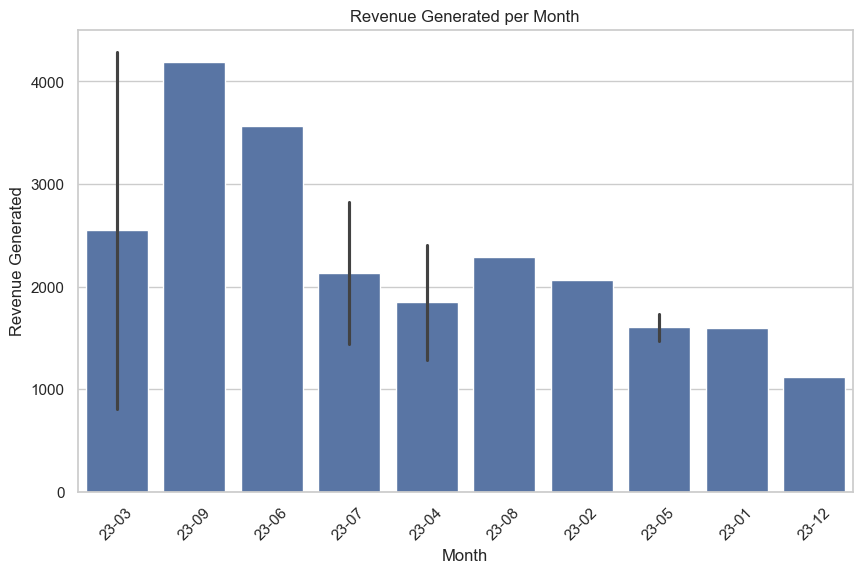

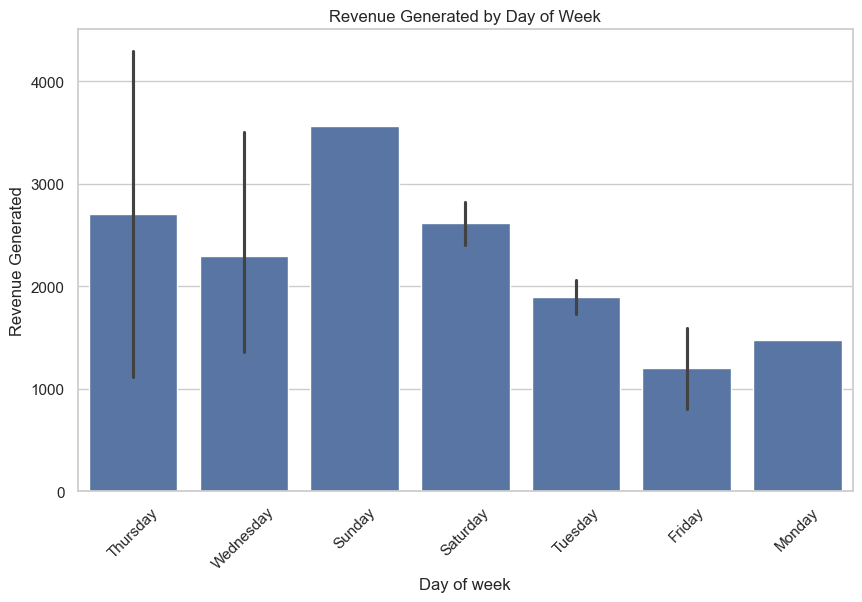

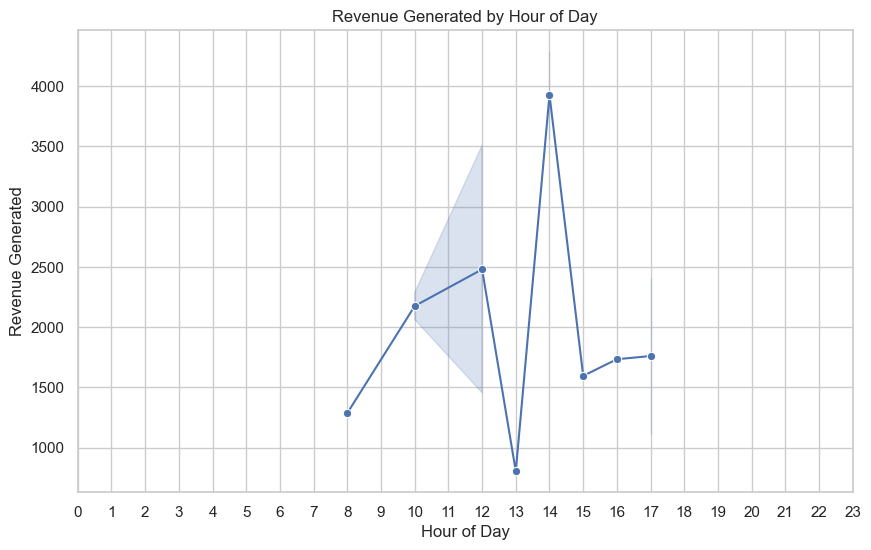

In [18]:
df = pd.read_sql("""
with appointment_revenue as (
    select 
        date_format(a.appointment_date, '%%y-%%m') as month,
        dayname(a.appointment_date) as day_of_week,
        hour(a.appointment_time) as hour_of_day,
        count(*) as appointment_count,
        sum(b.amount) as revenue_generated,
        row_number() over (order by sum(b.amount) desc) as rn_desc,
        row_number() over (order by sum(b.amount)) as rn_asc
    from appointments a
    join treatments t on a.appointment_id = t.appointment_id
    join billing b on t.treatment_id = b.treatment_id
    where a.status = 'Completed' and b.payment_status = 'paid'
    group by month, day_of_week, hour_of_day
)
select month, day_of_week, hour_of_day, appointment_count, revenue_generated,
       rn_desc, rn_asc
from appointment_revenue
order by revenue_generated desc;
""", con=engine)
df_top_bottom = df.query("rn_desc <= 5 or rn_asc <= 5")
print('== Top & Bottom 5 Revenue Periods ==')
print(tabulate(df_top_bottom, headers="keys", tablefmt="psql", showindex=False))

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='month', y='revenue_generated') 
plt.title("Revenue Generated per Month")
plt.xlabel("Month")
plt.ylabel("Revenue Generated")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day_of_week', y='revenue_generated')
plt.title("Revenue Generated by Day of Week")
plt.xlabel("Day of week")
plt.ylabel("Revenue Generated")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='hour_of_day', y='revenue_generated', marker='o')
plt.title("Revenue Generated by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue Generated")
plt.xticks(range(0,24))
plt.show()

### Insights:-
- Highest revenue appointment:- March, Thursday at 14:00 (4289 USD).
- Top 3 revenue-generating appointments: March 23, September 23, June 23 (all single appointments over (3500 USD)
- lowest revenue generated on March 23, Friday :- (804.26 USD)
### Trends:- 
- Daily Revenue:- Most money comes on Sunday, then Thursday and Saturday. The lowest is on Friday.
- Hourly Revenue:- Revenue has two peaks — around 10 a.m. and 2 p.m. It drops at 1 p.m. and after 3 p.m. (maybe because of lunch time)
- Monthly Revenue:- Most revenue is in September and June. December has the lowest revenue.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">17. How Appointment Outcomes Affect Payments</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> The goal is to connect patient behavior (appointments) with financial results (payments) to find revenue gaps.</li>
      </ul>
  </div>
</div>


+--------------+----------------------+------------------+------------------+
| patient_id   | appointment_status   | treatment_type   | payment_status   |
|--------------+----------------------+------------------+------------------|
| P001         | Scheduled            | Chemotherapy     | Failed           |
| P001         | Cancelled            | Chemotherapy     | Failed           |
| P001         | Scheduled            | ECG              | Paid             |
| P001         | No-show              | Physiotherapy    | Pending          |
| P002         | Scheduled            | Physiotherapy    | Failed           |
| P002         | Scheduled            | X-Ray            | Pending          |
| P002         | Cancelled            | Chemotherapy     | Paid             |
| P003         | Scheduled            | MRI              | Paid             |
| P003         | Scheduled            | MRI              | Pending          |
| P004         | Completed            | ECG              | Faile

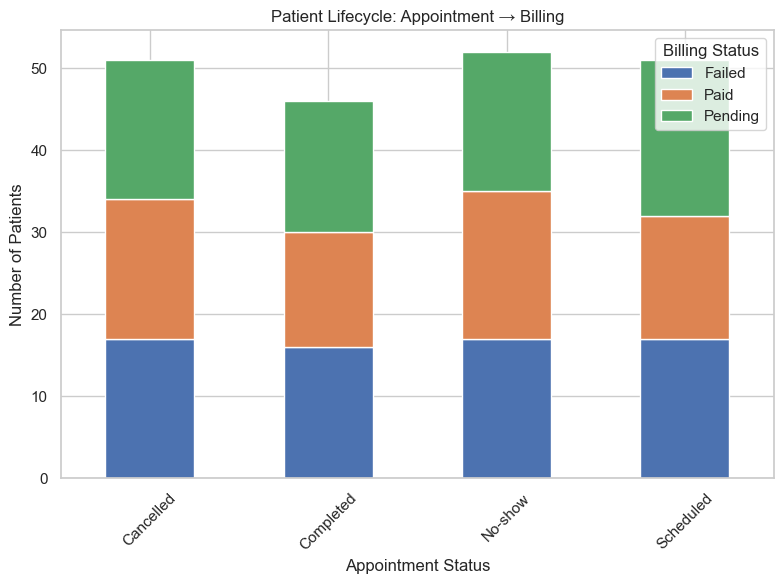

In [31]:
df_lifecycle = pd.read_sql("""
SELECT 
    p.patient_id,
    a.status AS appointment_status,
    t.treatment_type,
    b.payment_status
FROM patients p
JOIN appointments a ON p.patient_id = a.patient_id
LEFT JOIN treatments t ON a.appointment_id = t.appointment_id
LEFT JOIN billing b ON t.treatment_id = b.treatment_id
ORDER BY p.patient_id, a.appointment_id;
""", con=engine)
print(tabulate(df_lifecycle.head(20), headers="keys", tablefmt="psql", showindex=False))

lifecycle_counts = df_lifecycle.groupby(["appointment_status", "payment_status"]).size().reset_index(name="count")
pivot = lifecycle_counts.pivot(index="appointment_status", columns="payment_status", values="count").fillna(0)

pivot.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Patient Lifecycle: Appointment → Billing")
plt.xlabel("Appointment Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title="Billing Status")
plt.tight_layout()
plt.show()

### Insights:-
- any scheduled appointments end with Failed or Pending payments:- shows weak follow-up on billing.
- Cancelled & No-show appointments still appear with billing records:- wasted resources, no real revenue.
- Even Completed appointments don’t always mean success:- some are marked as Failed or Pending in payment.
- Paid status is scattered (ECG, MRI, Physiotherapy, Chemotherapy) but very few compared to Failed/Pending.
- Patient P005 has the most inconsistent history (Scheduled, Completed, No-shows with mixed payment results).
Overall: High cancellations + low payment success = major revenue loss.

<div style="font-family:'Segoe UI', sans-serif; margin: 20px 0;">
  
  <!-- Main Heading -->
  <div style="background: linear-gradient(to right, #8e24aa, #ba68c8); padding: 12px 20px; border-radius: 8px 8px 0 0;">
    <h2 style="color:white; margin:0;">18. Active age groups</h2>
  </div>

  <!-- Sub-queries / Objectives -->
  <div style="background-color:#f3e5f5; padding: 16px 20px; border-left: 5px solid #8e24aa; border-radius: 0 0 8px 8px;">
    <p style="margin:0; color:#4a148c; font-size:18px;"><b>Objectives:</b></p>
    <ul style="margin:8px 0 0 20px; color:#4a148c; font-size:16px; line-height:1.6;">
      <li><b></b> The goal is to find trends in active age groups.</li>
      </ul>
  </div>
</div>


+-------------+---------------------+
|   age_group |   appointment_count |
|-------------+---------------------|
|          30 |                  55 |
|          20 |                  49 |
|          50 |                  38 |
|          40 |                  26 |
|          70 |                  21 |
|          60 |                  11 |
+-------------+---------------------+


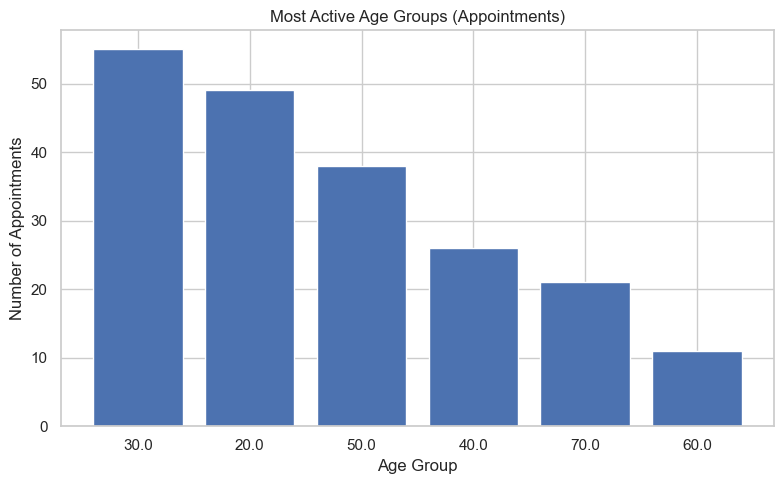

In [30]:
df_age_groups = pd.read_sql("""
SELECT 
    FLOOR(TIMESTAMPDIFF(YEAR, p.date_of_birth, CURDATE())/10)*10 AS age_group,
    COUNT(a.appointment_id) AS appointment_count
FROM patients p
JOIN appointments a ON p.patient_id = a.patient_id
GROUP BY age_group
ORDER BY appointment_count DESC;
""", con=engine)
print(tabulate(df_age_groups, headers="keys", tablefmt="psql", showindex=False))

plt.figure(figsize=(8,5))
plt.bar(df_age_groups['age_group'].astype(str), df_age_groups['appointment_count'])
plt.title("Most Active Age Groups (Appointments)")
plt.xlabel("Age Group")
plt.ylabel("Number of Appointments")
plt.tight_layout()
plt.show()

### Insights:-
- Patients in their 30s (55 appointments) booked the most appointments.
- Patients in their 20s (49) are the second highest group.
- Older age groups (50+, especially 60s with only 11) bookd fewer appointments.